In [10]:
import sys
assert sys.version_info >= (3, 5)
import time
import warnings
import os

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn.linear_model

import seaborn as sns

import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from scipy.stats import pearsonr
warnings.filterwarnings("ignore")

#Options and parameters.
dataFileName = "country_vaccinations.csv"

#Load the file using pandas
df = pd.read_csv(dataFileName)
df.head()

#Establish the helper functions
def clearNullsWithMean(dataFrame, featureName):
    dataFrame[featureName].fillna(dataFrame[featureName].mean(), inplace = True)
    dataFrame.fillna(0, inplace = True)
    return None

def clearNullsWithZero(dataFrame, featureName):
    dataFrame[featureName].fillna(0, inplace = True)
    dataFrame.fillna(0, inplace = True)
    return None

R-Squared:  0.018302533211747685


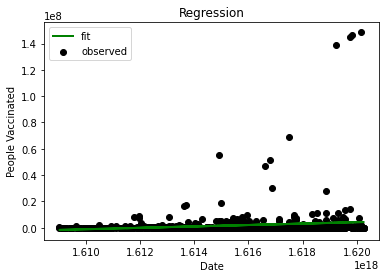

In [13]:
df.shape
df.isna().sum()

#Test-train data split
train_df, test_df = train_test_split(df, shuffle=True, test_size = 0.95, random_state=17)

#Convert dates into the date type and then into the integer type.
x = train_df['date']
x = [pd.to_datetime(d).value for d in x]

#Clean the set of nulls/NaNs
clearNullsWithZero(df, 'date')
clearNullsWithZero(df, 'people_vaccinated')

#Reshape the Y set.
y = train_df['people_vaccinated']
x2 = np.array(x).reshape(-1,1)
#print(x2)

#Load the linear regression model
model = sklearn.linear_model.LinearRegression()
model.fit(x2,y)

#display the R-Squared score
r_sq = model.score(x2, y)
print("R-Squared: ", r_sq)

plt.scatter(x2, y, color='black', label='observed')
plt.plot(x2, model.predict(x2), label='fit', color='Green', linewidth=2)
plt.xlabel('Date')
plt.ylabel('People Vaccinated')
plt.title('Regression')
plt.legend(loc='best')

plt.show()
